Random Forest
Features: Energy, Dots, Edges

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Machine Learning/Edge&Line_Detection"

/content/drive/MyDrive/Machine Learning/Edge&Line_Detection


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import glob
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
X_train = list()
X_test = list()
y_train = list()
y_test = list()

In [ ]:
# 0 = crazing 
# 1 = inclusion
# 2 = patches
# 3 = pitted_surface
# 4 = rolled in scale
# 5 = scratches

In [ ]:
dataset = pd.read_csv('train_features_extracted.csv')

In [ ]:
dataset

,Class,Energy,Dots,Lines,contours,Edges,Corners
0,crazing,153.854106,339,2,2,12857,2
1,crazing,98.900338,288,2,2,8345,2
2,crazing,122.753619,327,2,2,10913,2
3,crazing,110.394338,379,2,2,9927,2
4,crazing,135.667513,266,2,2,11858,2
...,...,...,...,...,...,...,...
1435,scratches,9.140425,61,2,2,70,2
1436,scratches,14.365756,0,2,2,808,2
1437,scratches,9.262863,3,2,2,721,2
1438,scratches,17.461644,0,2,2,975,2


In [ ]:
x = dataset.iloc[:, [1,2,5]].values

In [ ]:
x

array([[1.53854106e+02, 3.39000000e+02, 1.28570000e+04],
       [9.89003375e+01, 2.88000000e+02, 8.34500000e+03],
       [1.22753619e+02, 3.27000000e+02, 1.09130000e+04],
       ...,
       [9.26286250e+00, 3.00000000e+00, 7.21000000e+02],
       [1.74616438e+01, 0.00000000e+00, 9.75000000e+02],
       [1.08811813e+01, 6.00000000e+00, 6.02000000e+02]])

In [ ]:
x[0]

array([  153.85410625,   339.        , 12857.        ])

In [ ]:
X_train = x 

In [ ]:
print(len(X_train))

1440


In [ ]:
for j in range(0,6):
    for i in range(0,240):
        y_train.append(j)

In [ ]:
print(y_train)
print(len(y_train))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
dataset2 = pd.read_csv('test_features_extracted.csv')

In [ ]:
x = dataset2.iloc[:, [1,2,5]].values

In [ ]:
print(x)

[[1.46419744e+02 3.14000000e+02 1.21900000e+04]
 [1.35537719e+02 2.28000000e+02 1.15250000e+04]
 [1.52394050e+02 2.91000000e+02 1.23890000e+04]
 ...
 [2.44281188e+01 1.40000000e+01 1.00100000e+03]
 [3.19947250e+01 3.00000000e+00 9.37000000e+02]
 [2.13497813e+01 7.00000000e+00 7.43000000e+02]]


In [ ]:
print(len(x))

360


In [ ]:
X_test = x

In [ ]:
for j in range(0,6):
    for i in range(0,60):
        y_test.append(j)

In [ ]:
print(len(y_test))

360


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1440, 3) (1440,)
Test set: (360, 3) (360,)


In [ ]:
nsamples, nx = X_train.shape
X_train = X_train.reshape((nsamples,nx))

In [ ]:
print(X_train.shape)

(1440, 3)


In [ ]:
nsamples, nx = X_test.shape
X_test = X_test.reshape((nsamples,nx))

In [ ]:
print(X_test.shape)

(360, 3)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
train_accuracy = list()
test_accuracy = list()
no_of_estimators = list()

In [ ]:
for i in range(10,100,5) :
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=i)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_train)
    #print("Train Accuracy:",metrics.accuracy_score(output_class, y_pred))
    train_accuracy.append(metrics.accuracy_score(y_train, y_pred))

    y_pred_test = clf.predict(X_test)
    #print("Test Accuracy:",metrics.accuracy_score(output_predict_class, y_pred_test))
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))

    no_of_estimators.append(i)

In [ ]:
print(train_accuracy)
print(test_accuracy)
print(no_of_estimators)

[0.9951388888888889, 0.9965277777777778, 0.9986111111111111, 0.9993055555555556, 0.9972222222222222, 1.0, 0.9986111111111111, 1.0, 1.0, 0.9993055555555556, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8277777777777777, 0.8527777777777777, 0.8611111111111112, 0.8333333333333334, 0.8555555555555555, 0.8472222222222222, 0.8416666666666667, 0.8555555555555555, 0.8444444444444444, 0.8472222222222222, 0.8416666666666667, 0.8472222222222222, 0.85, 0.8472222222222222, 0.8444444444444444, 0.8527777777777777, 0.8444444444444444, 0.8305555555555556]
[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


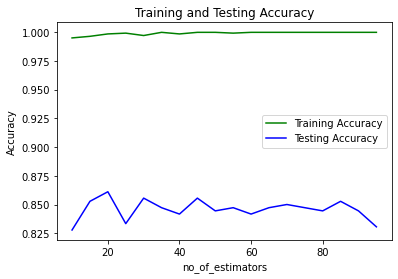

In [ ]:
plt.plot(no_of_estimators, train_accuracy, 'g', label='Training Accuracy')
plt.plot(no_of_estimators, test_accuracy, 'b', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('no_of_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
max(test_accuracy)

0.8611111111111112

In [ ]:
import time

In [ ]:
train_begin = time.time()
clf=RandomForestClassifier(n_estimators=15)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)
train_end = time.time()
train_time = train_end - train_begin

time.sleep(5)

y_pred=clf.predict(X_train)
test_begin = time.time()
y_pred_test = clf.predict(X_test)
test_end = time.time()
test_time = test_end - test_begin

print(metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

0.85
[[52  0  7  0  1  0]
 [ 0 39  0 18  0  3]
 [ 4  0 56  0  0  0]
 [ 6  4  2 42  0  6]
 [ 0  0  0  0 60  0]
 [ 0  0  0  3  0 57]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        60
           1       0.91      0.65      0.76        60
           2       0.86      0.93      0.90        60
           3       0.67      0.70      0.68        60
           4       0.98      1.00      0.99        60
           5       0.86      0.95      0.90        60

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



In [ ]:
print(train_time)
print(test_time/len(X_test))

0.039020538330078125
8.561876085069445e-06


In [ ]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix.diagonal()/matrix.sum(axis=1)


array([0.86666667, 0.65      , 0.93333333, 0.7       , 1.        ,
       0.95      ])

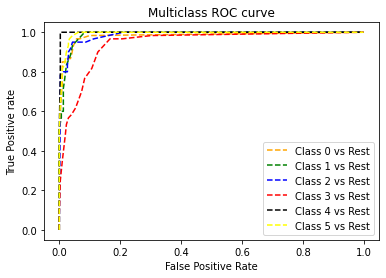

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_prob = clf.predict_proba(X_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 6

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)


# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  